In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM  
from PIL import Image
import requests
import copy

/nfs/helium2/arjun/.conda/envs/leap_detect/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_id = 'microsoft/Florence-2-large'
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True).eval().cuda()
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

def run_example(task_prompt, text_input=None):
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
      input_ids=inputs["input_ids"].cuda(),
      pixel_values=inputs["pixel_values"].cuda(),
      max_new_tokens=1024,
      early_stopping=False,
      do_sample=False,
      num_beams=3,
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    parsed_answer = processor.post_process_generation(
        generated_text, 
        task=task_prompt, 
        image_size=(image.width, image.height)
    )

    return parsed_answer

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
# image = Image.open(requests.get(url, stream=True).raw)

image_path = "BokChoi/IMG_4666.jpg"
image = Image.open(image_path)

In [22]:
task_prompt = '<CAPTION>'
run_example(task_prompt)

{'<CAPTION>': '\nA tray filled with green plants sitting on top of a table.\n'}

In [23]:
task_prompt = '<DETAILED_CAPTION>'
run_example(task_prompt)

{'<DETAILED_CAPTION>': '\nThe image shows a close up of a plastic container filled with watercress plants and moss. The container is filled to the brim with the vibrant green leaves of the plants, and the moss is visible on the surface of the container. In the background, there is a wooden object, adding to the rustic feel of the image.\n'}

In [24]:
task_prompt = '<MORE_DETAILED_CAPTION>'
run_example(task_prompt)

{'<MORE_DETAILED_CAPTION>': '\nThe image shows a close-up of a white plastic container filled with green plants. The plants appear to be microgreens, with small leaves and small stems. There are several pieces of wood or stone scattered around the container, some of which are covered in moss or lichen. The leaves are a vibrant green color and have a slightly wrinkled texture. The soil in the container is dark green and appears to be well-maintained. The background is blurred, but it seems to be a garden or a greenhouse with other plants visible.\n'}

In [25]:
task_prompt = '<OD>'
results = run_example(task_prompt)
print(results)

{'<OD>': {'bboxes': [[2.0160000324249268, 563.9760131835938, 4025.9521484375, 3019.4638671875]], 'labels': ['houseplant']}}


In [26]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches  
def plot_bbox(image, data):
   # Create a figure and axes  
    fig, ax = plt.subplots()  
      
    # Display the image  
    ax.imshow(image)  
      
    # Plot each bounding box  
    for bbox, label in zip(data['bboxes'], data['labels']):  
        # Unpack the bounding box coordinates  
        x1, y1, x2, y2 = bbox  
        # Create a Rectangle patch  
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')  
        # Add the rectangle to the Axes  
        ax.add_patch(rect)  
        # Annotate the label  
        plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))  
      
    # Remove the axis ticks and labels  
    ax.axis('off')  
      
    # Show the plot  
    plt.show()  

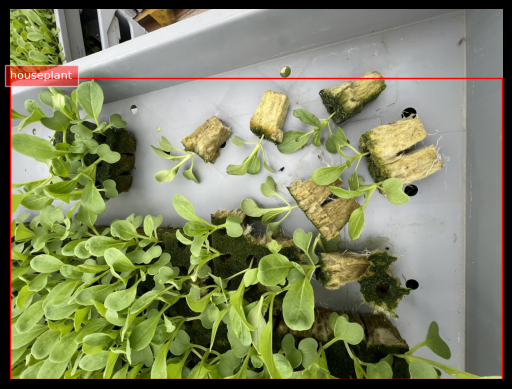

In [27]:
plot_bbox(image, results['<OD>'])

In [28]:
task_prompt = '<REGION_PROPOSAL>'
results = run_example(task_prompt)
print(results)

{'<REGION_PROPOSAL>': {'bboxes': [[2.0160000324249268, 563.9760131835938, 4025.9521484375, 3019.4638671875], [2.0160000324249268, 1.5119999647140503, 465.6960144042969, 618.407958984375]], 'labels': ['', '']}}


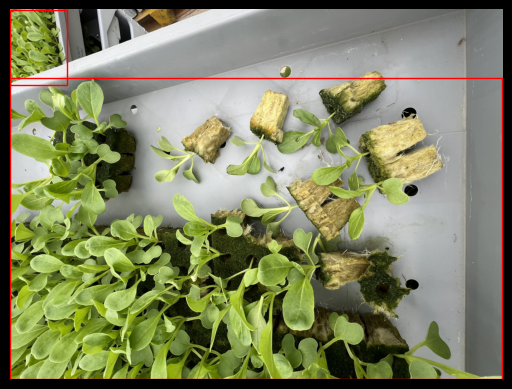

In [29]:
plot_bbox(image, results['<REGION_PROPOSAL>'])

In [32]:
task_prompt = '<CAPTION_TO_PHRASE_GROUNDING>'
results = run_example(task_prompt, text_input="Bok Choi.")
print(results)

{'<CAPTION_TO_PHRASE_GROUNDING>': {'bboxes': [[2.0160000324249268, 1.5119999647140503, 4025.9521484375, 3019.4638671875], [2.0160000324249268, 485.35198974609375, 4025.9521484375, 3019.4638671875]], 'labels': ['Bok Choi', 'Bok Choi']}}


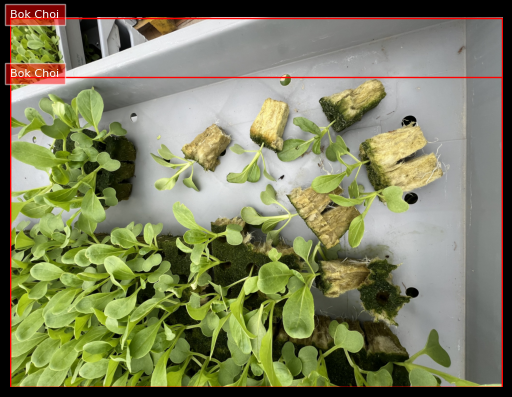

In [33]:
plot_bbox(image, results['<CAPTION_TO_PHRASE_GROUNDING>'])

In [44]:
task_prompt = '<REFERRING_EXPRESSION_SEGMENTATION>'
results = run_example(task_prompt, text_input="vegetable")
print(results)

{'<REFERRING_EXPRESSION_SEGMENTATION>': {'polygons': [[[2530.080078125, 678.8880004882812, 2534.112060546875, 672.8399658203125, 2538.14404296875, 669.8159790039062, 2542.176025390625, 666.7919921875, 2546.2080078125, 663.7680053710938, 2550.239990234375, 660.7439575195312, 2554.27197265625, 657.719970703125, 2558.303955078125, 657.719970703125, 2562.3359375, 654.6959838867188, 2566.367919921875, 654.6959838867188, 2570.400146484375, 651.6719970703125, 2574.43212890625, 651.6719970703125, 2578.464111328125, 648.6480102539062, 2582.49609375, 648.6480102539062, 2586.528076171875, 648.6480102539062, 2590.56005859375, 648.6480102539062, 2594.592041015625, 645.6239624023438, 2598.6240234375, 645.6239624023438, 2602.656005859375, 645.6239624023438, 2606.68798828125, 642.5999755859375, 2610.719970703125, 642.5999755859375, 2614.751953125, 642.5999755859375, 2618.783935546875, 639.5759887695312, 2622.816162109375, 639.5759887695312, 2626.84814453125, 639.5759887695312, 2630.880126953125, 636.5

In [45]:
from PIL import Image, ImageDraw, ImageFont 
import random
import numpy as np
colormap = ['blue','orange','green','purple','brown','pink','gray','olive','cyan','red',
            'lime','indigo','violet','aqua','magenta','coral','gold','tan','skyblue']
def draw_polygons(image, prediction, fill_mask=False):  
    """  
    Draws segmentation masks with polygons on an image.  
  
    Parameters:  
    - image_path: Path to the image file.  
    - prediction: Dictionary containing 'polygons' and 'labels' keys.  
                  'polygons' is a list of lists, each containing vertices of a polygon.  
                  'labels' is a list of labels corresponding to each polygon.  
    - fill_mask: Boolean indicating whether to fill the polygons with color.  
    """  
    # Load the image  
   
    draw = ImageDraw.Draw(image)  
      
   
    # Set up scale factor if needed (use 1 if not scaling)  
    scale = 1  
      
    # Iterate over polygons and labels  
    for polygons, label in zip(prediction['polygons'], prediction['labels']):  
        color = random.choice(colormap)  
        fill_color = random.choice(colormap) if fill_mask else None  
          
        for _polygon in polygons:  
            _polygon = np.array(_polygon).reshape(-1, 2)  
            if len(_polygon) < 3:  
                print('Invalid polygon:', _polygon)  
                continue  
              
            _polygon = (_polygon * scale).reshape(-1).tolist()  
              
            # Draw the polygon  
            if fill_mask:  
                draw.polygon(_polygon, outline=color, fill=fill_color)  
            else:  
                draw.polygon(_polygon, outline=color)  
              
            # Draw the label text  
            draw.text((_polygon[0] + 8, _polygon[1] + 2), label, fill=color)  
  
    # Save or display the image  
    #image.show()  # Display the image  
    display(image)

In [ ]:
output_image = copy.deepcopy(image)
draw_polygons(output_image, results['<REFERRING_EXPRESSION_SEGMENTATION>'], fill_mask=True)  